<a href="https://colab.research.google.com/github/MalekBEKRI97/ComponentEditor/blob/master/F_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data

### Importing Libraries

In [ ]:
import pandas

### Data Loading

In [ ]:
# if the fil is on Colab
dataset = pandas.read_csv('pokedex.csv')

In [ ]:
# if the file is online somewhere as a csv
dataset = pandas.read_csv('https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/pokedex_(Update_05.20).csv')

In [ ]:
#pandas.read_...
#badel les ... ib wa7da min hedhouma: csv, json, html, pickle etc...

### Exploratory Data Analysis (EDA)

In [ ]:
# fi wist dataframe, najmou na3rfou 7ajtin:
# Attribut li howa une information deja mawjouda
# Fonction ti7siblna 7aja

In [ ]:
dataset.shape #number of rows and columns

(1028, 51)

In [ ]:
dataset.columns # names of columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [ ]:
dataset.head() # first rows (5 by default)
dataset.tail() # last rows (5 by default)
dataset.sample() # random rows (1 by default)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
227,227,186,Politoed,Quaxo,ニョロトノ (Nyorotono),2,Normal,Frog Pokémon,1,Water,NaN,1.1,33.9,3,Water Absorb,Damp,Drizzle,500.0,90.0,75.0,75.0,90.0,100.0,70.0,45.0,70.0,225.0,Medium Slow,1,Water 1,NaN,50.0,20.0,1.0,0.5,0.0,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [ ]:
dataset.info() 
# many columns have missing data
# all columns are correctly typed
# memory size is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   uint8  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [ ]:
# generation has 8 unique values > 0 --> cast to unit8
dataset['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#casting generatin to uint8
dataset['generation'] = dataset['generation'].astype("uint8")

In [ ]:
dataset.describe() #possibility of outlier in height_m and weight_kg

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:
type(dataset) # DataFrame
type(dataset['height_m']) # Series
type(dataset['height_m'].values) # array

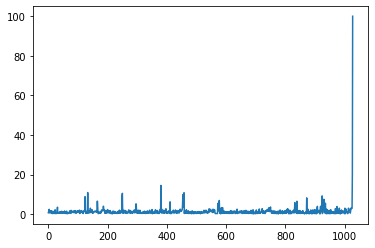

In [ ]:
dataset['height_m'].plot() 
# Outlier in height_m (100m)
# weight: no outlier

In [ ]:
# Filtering (conditional selection)
dataset[ dataset['height_m'] > 90 ]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
dataset[ dataset['species'] == "Gigantic Pokémon"]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


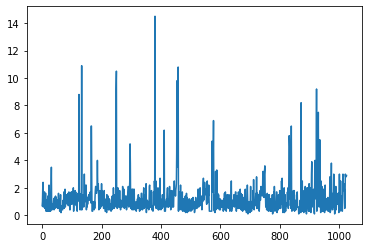

In [ ]:
dataset[ dataset['height_m'] < 20 ]['height_m'].plot()

In [ ]:
tall_legendary_pokemons = dataset[ (dataset['height_m'] > 10) & (dataset['status'] == "Legendary")]
tall_legendary_pokemons

In [ ]:
dataset.describe(include="object")

,name,german_name,japanese_name,status,species,type_1,type_2,ability_1,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2
count,1028,938,938,1028,1028,1028,542,1025,513,810,1027,1025,282
unique,1028,807,807,4,641,18,18,202,126,154,6,15,11
top,Dragalge,Rotom,ロトム (Rotom),Normal,Mouse Pokémon,Water,Flying,Levitate,Frisk,Telepathy,Medium Fast,Field,Water 1
freq,1,6,6,915,12,134,109,41,17,21,432,258,76


In [ ]:
# Getting values
dataset['status'].count()  # number of non NaN values
dataset['status'].unique()   # unique values
dataset['status'].nunique()  # number of unique values
dataset.dtypes # returns types of columns

In [ ]:
dataset.sort_values('weight_kg', ascending=False)

In [ ]:
dataset.isna().sum() # how many missing values we have per column
dataset.isnull().sum() #same thing
# if we add another .sum() we have number of total missing values

In [ ]:
dataset[ dataset.isnull().any(axis=1) ] # rows li fehom at least 1 missing value
dataset[ dataset.isnull().all(axis=1) ] # rows li columns kol te3ha null

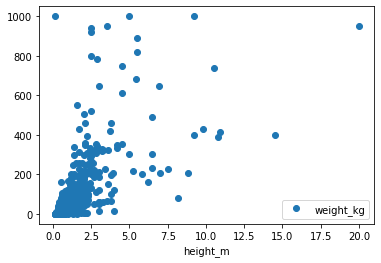

In [ ]:
dataset.plot(x="height_m", y="weight_kg", style="o")

## Data Preprocessing / cleaning

In [ ]:
# colonnes ( Unnamed, german_name, japanese_name, pokedex_number) najmou nistghanew minhom
dataset.drop(["Unnamed: 0",'japanese_name','pokedex_number','german_name'], axis=1, inplace=True)

In [ ]:
dataset.drop([2,5], axis=0, inplace=True) # drops rows with indices 2 & 5

In [ ]:
dataset.rename(columns = {'generation ':'gen'}, inplace=True)

In [ ]:
dataset['bmi'] = dataset['weight_kg'] / dataset['height_m']
dataset['bmi'] = 0
# if bmi column exists, the values will be replaced
# else the column will be created and assigned the right side

In [ ]:
dataset.to_csv("new.csv", index=False)

In [ ]:
# to change order of columns do the following with the dolumns ordered like you want
# to get the list of columns use dataset.columns
dataset = dataset[['gen', 'status','name', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy', 'bmi']]

# Part 2: ML

#### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data Loading

In [ ]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/dataset_malwares.csv')

#### EDA

In [ ]:
dataset.shape

(19611, 78)

In [ ]:
dataset.sample(5) 

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
1067,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,128,332,3,1190241051,0,0,224,270,267,8,0,53248,8192,0,60119,8192,4194304,8192,4096,4,0,0,0,4,0,4096,0,106496,2,1024,1048576,4096,1048576,4096,0,16,1,0,0,3,1.090746,0,4096,0,1056,0,53248,0,73728,0,61440,0,3791650912,0,1,1,0,0,59664,65536,0,0
18685,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,232,332,6,1377140056,0,0,224,8450,267,11,0,5120,5632,0,6065,4096,268435456,4096,512,6,3,6,3,6,3,1024,50096,32768,3,320,262144,4096,1048576,4096,0,16,0,0,0,6,0.285782,0,512,0,163,0,4325,0,28672,0,9728,0,3221225536,0,9,41,4,8256,20680,24576,0,0
7292,23117,80,2,0,4,15,65535,0,184,0,0,0,64,26,0,0,256,332,8,708992537,0,0,224,33166,267,2,25,47616,21504,0,49600,4096,4194304,4096,512,4,0,6,0,4,0,1024,2435228,98304,2,32768,1048576,16384,1048576,4096,0,16,1,24,0,8,0.000000,0,0,0,8,0,47336,0,86016,0,58368,0,3221225536,0,11,114,0,0,65536,86016,0,2425248
19334,23117,0,0,0,0,0,0,0,0,0,0,0,64,0,0,0,128,34404,4,1377160312,0,0,240,8226,523,11,0,0,0,0,0,0,6442647552,4096,512,5,2,0,0,5,2,1024,0,409600,3,320,0,0,0,0,0,16,0,0,0,4,2.736588,0,6144,0,5888,0,291332,0,401408,0,391680,0,3758096448,0,0,0,0,0,0,106496,108860,0
12184,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,332,5,1357726934,0,0,224,258,267,10,0,126464,467456,0,82629,4096,4194304,4096,512,5,1,0,0,5,1,1024,658301,618496,2,32832,10000000,4096,1048576,4096,0,16,1,11,0,5,4.288402,0,8704,0,9170,0,424176,0,606208,0,585728,0,3221225536,0,6,143,0,0,152828,180224,0,594944


In [ ]:
# bch nfasakh Name khater lesemi dima titbadel w easy bch tghaltou in the future
# inajem il model ya3mel overfitting 3al name de facon kol ma ira Virus Share i9olik malware
# iwali meme pas irakez m3al be9i, just irakiz m3al name
dataset.drop('Name',axis=1, inplace=True)

In [ ]:
# isna().sum() gives number of missing values per column
# isna().sum().sum() gives total number of missing values in the dataset
dataset.isna().sum().sum() 
#no missing values, parfait

In [ ]:
dataset.info()
# no mistypes, no need to cast types
# no objects (strings), no need for categorical encoding

In [ ]:
dataset['Malware'].value_counts()
# 1/4 of the data is not malware --> Class Imbalance

1    14599
0     5012
Name: Malware, dtype: int64

(array([ 5012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14599.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

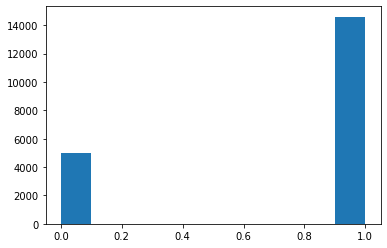

In [ ]:
plt.hist(dataset['Malware'])
# Big class imabalance (1/4) wa laken  fi cas ta3 antivirus we want the model to be stronk
# on the Malware (1) donc nkhaliwha for now haka

In [ ]:
dataset.describe()
# we can remove and encode many features (ex: e_magic)

#### Data Preparation

In [ ]:
features = dataset.drop('Malware', axis=1)
labels = dataset['Malware']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=10)

#### Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

svm = SVC()
knn = KNeighborsClassifier()
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

In [ ]:
0 - 0 --> parfait
0 - 1 --> ghalta
1 - 0 --> ghalta
1 - 1 --> parfait

accuracy ta3tini mesure globale ta3 9adeh jib s7i7 en total
recall ta3tini mesure ta3 9adeh min 1 jibtou 0 (9adeh min malware ma chla9tich bih) <----- AHAM HAJA
precision ta3tini mesure 9adeh min 0 jibtou 1 (9adeh min prog 3adi fibeli bih virus)

In [ ]:
log.score(X_test, y_test) #.score calculates the accuracy of the model

0.2648483303594188

In [ ]:
svm.score(X_test, y_test)

0.7392301809839409

In [ ]:
knn.score(X_test, y_test)

0.987254652052001

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = svm.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,predictions)
rec = recall_score(y_test,predictions)
prec = precision_score(y_test,predictions)
f1 = f1_score(y_test, predictions)

In [ ]:
print(acc, rec, prec, f1) 
# while recall is perfect, precision 7ala meaning that the model is giving too many 1s which is not balanced

0.7392301809839409 1.0 0.738162272843614 0.8493594463260198


In [ ]:
print(acc, rec, prec, f1)
# All values are balanced, perfect

0.987254652052001 0.9941054091539528 0.9886206896551725 0.9913554633471646


In [ ]:
from sklearn.metrics import classification_report
# all values are balanced
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1039
           1       0.99      0.99      0.99      2884

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



In [ ]:
print(classification_report(y_test, predictions))
# Recal for the non-malware label (0) is terrible, so discard SVM

              precision    recall  f1-score   support

           0       1.00      0.02      0.03      1039
           1       0.74      1.00      0.85      2884

    accuracy                           0.74      3923
   macro avg       0.87      0.51      0.44      3923
weighted avg       0.81      0.74      0.63      3923

